# MNIST Data


In this exercise, some data preprocessing steps are prepared (look it through so you understand it). Thereafter you will create two models. As always, the documentation is the place to go if you need to deepen your understanding or find out how to do something. 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Creating a function that will be used later

In [2]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

# Downloading the data and inspecting it

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [4]:
# print(mnist.DESCR)

In [5]:
print("X shape:", X.shape)
print("y shape: ", y.shape)

X shape: (70000, 784)
y shape:  (70000,)


In [6]:
# Taking less data to speed up training. 
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]

X_test = X[6000:7000]
y_test = y[6000:7000]

# Standardizing the data (as you generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

In [7]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (5000, 784)
y_train shape: (5000,)


In [8]:
# The first label ("true answer") is 5. 
y[0]

5

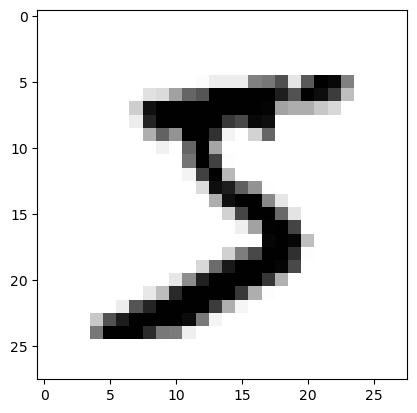

In [9]:
# Plotting the features of the X data, it looks like a 5.
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis("off")

# Creating a simple modell and evaluating it on the validation set

1. Create a linear support vector classifier model (random_state=42 is just used so we get same results due to the training algorithm beeing stochastic.):
```python
lin_clf = LinearSVC(random_state=42)
```

2. Fit the model on the scaled training data. **You might get an warning, ignore it.**
3. Predict the scaled validation data. 
4. Compute accuracy score, use the imported functionality: 
```python
from sklearn.metrics import accuracy_score
```
5. Visualize the confusion matrix, use the function we created: 
```python
def display_confusion_matrix
```

In [69]:
from sklearn.metrics import accuracy_score

# Introducing LinearSVC model
lin_clf = LinearSVC(random_state=42)


scores_lin_clf = cross_validate(lin_clf, X_train_scaled, y_train, cv=3, return_train_score = True,scoring = 'accuracy')

# Train model on train-set
lin_clf.fit(X_train_scaled, y_train)

/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [48]:
# Predict y_pred with m1 based on X_val_scaled
y_pred_val_m1 = lin_clf.predict(X_val_scaled)

In [54]:
# Calculate and Print Accuracy score
accuracy_score_m1 = accuracy_score( y_pred_val_m1, y_val)

print(accuracy_score_m1)

0.844


In [70]:
print(scores_lin_clf['train_score'])

[1.         0.99969997 0.99970006]


In [71]:
print(scores_lin_clf['test_score'])

[0.79964007 0.83683263 0.81992797]


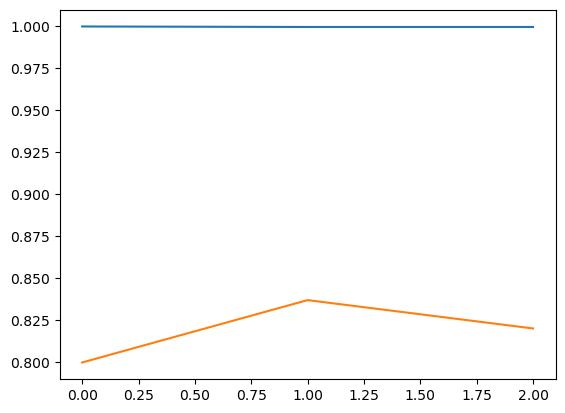

In [72]:
X=[k for k in range(len(scores_lin_clf['train_score']))]
plt.plot(X, scores_lin_clf['train_score'])
plt.plot(X, scores_lin_clf['test_score'])
plt.show()

# Modell Selection with Gridsearch
## Doing GridSearch (Takes a while to run) - remove the comments if you want to run the code

1. Create an instance of a general (not linear) SVC model. 
```python
svm_clf = SVC()
```
2. Specify a hyperparameter grid:
```python
hyper_param_grid = [
    {'kernel': ['rbf', 'poly'], 'gamma': [1, 2], 'C': [0.5, 1, 1.5]}
]
```
3. Use GridSearchCV and fit the model with the hyperparameter grid above **(note, fitting the model with grid_search takes a while)**.
4. If you for instance called your fine-tuned model in the step above for "gs_svm", then you can run this code:
```python
pd.DataFrame(gs_svm.cv_results_)
```
to analyze the grid search results. 

5. Predict the scaled validation data, compute the accuracy score, visualize the confusion matrix. 


6. Which model is better, the linear created above or this one where we used GridSearch?

In [13]:
%%time

# Instantiate SCV model
svm_clf = SVC()

# Define hyperparameter grid
hyper_param_grid = [
    {'kernel': ['rbf', 'poly'], 'gamma':[1,2], 'C': [0.5, 1, 1.5]}
]

grid_search = GridSearchCV(svm_clf, hyper_param_grid)

gs_svm= grid_search.fit(X_train_scaled, y_train)

print(gs_svm.best_params_)

#print(pd.DataFrame(gs_svm.cv_results_))


CPU times: user 5min 1s, sys: 320 ms, total: 5min 2s
Wall time: 5min 2s


In [14]:
# Predict y_pred with model 2 based on X_val_scaled
y_pred_val_m2 = gs_svm.predict(X_val_scaled)

In [15]:
# Calculate and Print Accuracy score for model 2
accuracy_score_m2 = accuracy_score(y_val, y_pred_val_m2)


In [16]:
print('Model 1 accuracy:', accuracy_score_m1)
print('Model 2 accuracy:', accuracy_score_m2)

Model 1 accuracy: 0.844
Model 2 accuracy: 0.94


# Model Evaluation on Test Data
Use the best model for evaluation on test data. 

In [17]:
y_pred_test_2 = gs_svm.predict(X_test_scaled)
accuracy_score_test_m2 = accuracy_score(y_test, y_pred_test_2)
print(accuracy_score_test_m2)

0.939


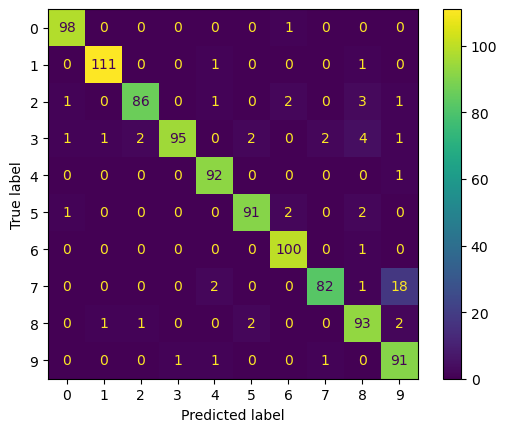

In [19]:
display_confusion_matrix(y_test, y_pred_test_2)

/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/keikietpham/opt/anaconda3/lib/python3.9/sit

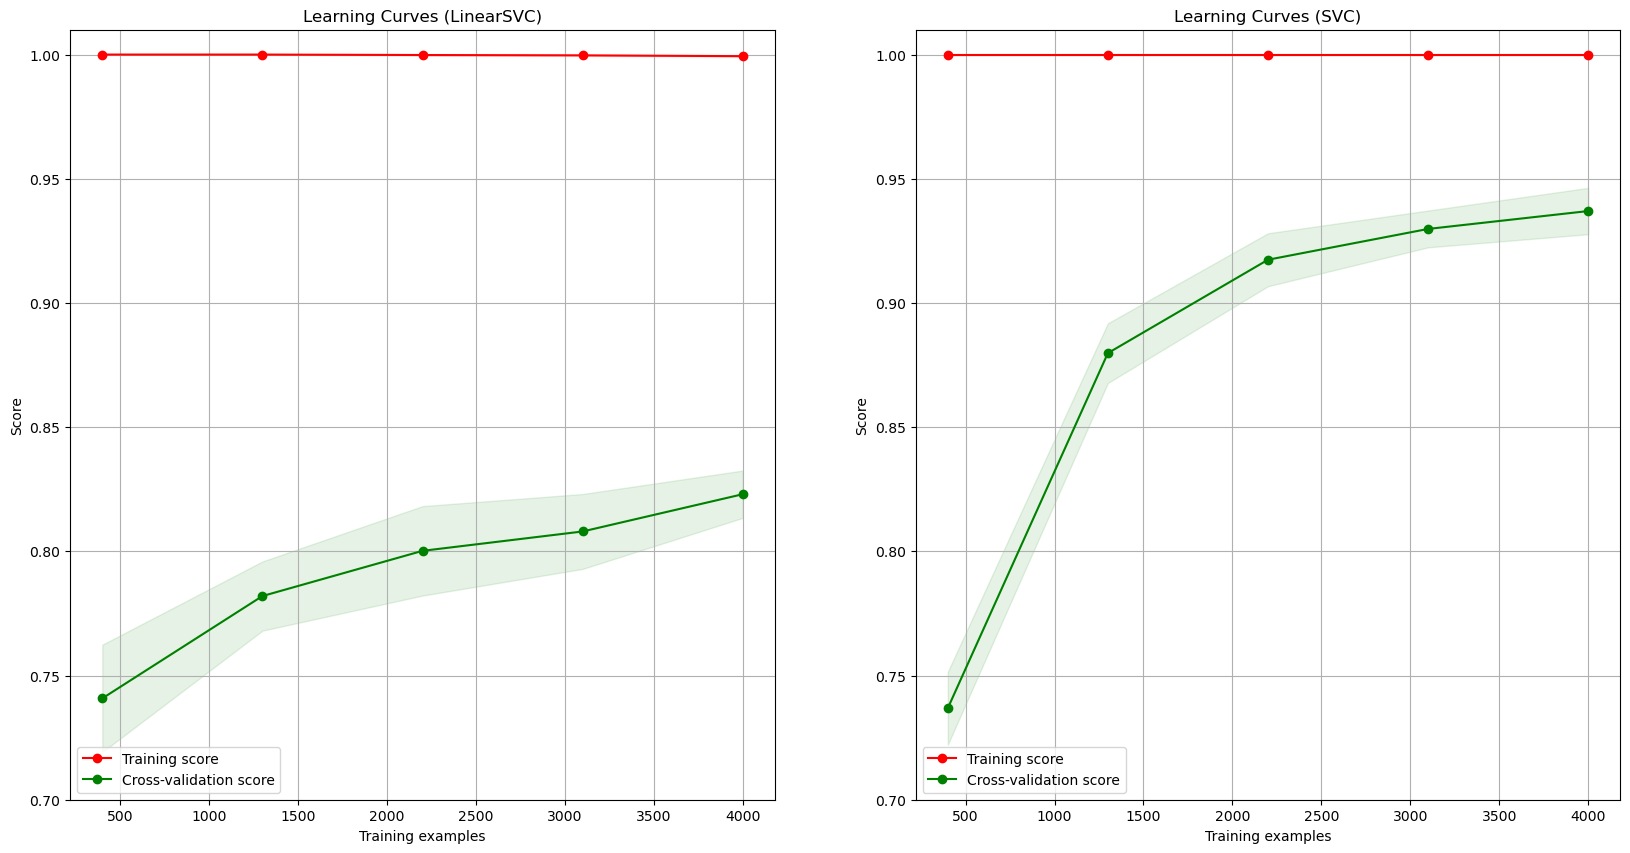

In [73]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
title = "Learning Curves (LinearSVC)"
plot_learning_curve(lin_clf, title, X_train_scaled, y_train, axes=axes[0], ylim=(0.7, 1.01), cv=5, n_jobs=-1)
title = "Learning Curves (SVC)"
plot_learning_curve(gs_svm.best_estimator_, title, X_train_scaled, y_train, axes=axes[1], ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()
